# Video-1 (For Slide1 and 2)
# Machine Learning in Time Series Forecasting	

# Overview of the Section

**1. Overview of the section**

revision
applied machune learning




# 1-Overview of this section


# What we have done So Far

# 2. Overview of Applied Machine Learning in Time Series Forecasting

It is a well-known fact that Machine Learning is a powerful technique in imaging, speech and natural language processing for a huge explicated dataset available. On the other hand,

 

1. Problems based on time series do not have usually interpreted datasets, even as data is collected from various sources they exhibit substantial variations in terms of features, properties, attributes, temporal scales, and dimensionality.

2. Time series analysis require sorting algorithms that can allow it to learn time-dependent patterns across multiple models which are different from images and speech.

3. Various machine learning tools such as classification, clustering, forecasting, and anomaly detection depend upon real-world business applications. 
 

Among various defined applications, we are discussing here Time series forecasting, which is an important area of machine learning because there are multiple problems involving time components for making predictions. 

There are multiple models and methods used as approaches for time series forecasting, let’s understand them more clearly;

**ML Methods For Time-Series Forecasting**
 
 

1. In the **Univariate Time-series Forecasting** method, forecasting problems contain only two variables in which one is time and the other is the field we are looking to forecast. 

For example, if you want to predict the mean temperature of a city for the coming week, now one parameter is time( week) and the other is a city. 
Another example could be when measuring a person’s heart rate per minute through using past observations of heart rate only. Now one parameter is time( minute) and the other is a heart rate.
 

2. On the other hand, in the **Multivariate Time-series Forecasting** method, forecasting problems contain multiple variables keeping one variable as time fixed and others can be multiple different parameters.



**Univariate Time-series Forecasting**

In the UTF following are the main forecasting Techniques

    1. Autoregression (AR)
    2. Moving Average (MA)
    3. Autoregressive Moving Average (ARMA)
    4. Autoregressive integrated moving average (ARIMA)
    5. Auto ARIMA
    6. Seasonal Autoregressive Integrated Moving-Average (SARIMA) 
    7. Auto - SARIMA 

There are many methods that we can use for time series forecasting and there is not a clear winner. Model selection should always depend on how your data looks and what you are trying to achieve. 

Some models may be more robust against outliers but perform badly than other models on simpler data and could still be the best choice depending on the use case.

When looking at your data the main split is wether we have extra regressors (features) to our time series or just the series. Based on this we can start exploring different methods for forecasting and their performance in different metrics.

In this section we will show models for both cases, time series with and without extra regressors.

# Video - 2(For Slide3)
# 3. Preparaing Data to Apply Forecasting

# A- First things First
**Import Libraries**

To work on the time series models, it is very improtant to have a well preprocessed dataset. In the previous section of this course, we have learned the basics of Data Manipulations to evaluate datasets in Python using Pandas, Numpy and MATPLOTLIB. Here we will use those techniques to modifiy our dataset with the support of Feature Engineering Methods and RVT Models.
To start this, first of all, we need to install basic libraries.



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# B- Overview of the Dataset
1. Load dataset into dataframe


In [ ]:
df= pd.read_csv('datasets/air_pollution.csv', parse_dates=['date'])


In [ ]:
df.columns


In [ ]:
df.drop(['dew', 'temp', 'temp',
       'press', 'wnd_spd','pollution_yesterday','snow','rain'], axis=1, inplace=True)
df.set_index('date', inplace=True)
df

In [ ]:
df.isnull().sum()

In [ ]:
df.plot(figsize=(15, 6))
plt.show()

# C- Compute the Difference

In [ ]:
df['pollution_today'].shift(1)

In [ ]:
#for one day
df['Pollution_today First Difference'] = df['pollution_today'] - df['pollution_today'].shift(1)

In [ ]:
#for 12 days
df['Pollution_today Seasonal First Difference']=df['pollution_today']-df['pollution_today'].shift(12)

In [ ]:
df.head(14)

# Revision of Stationary Check

In [ ]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['pollution_today'])
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

In [ ]:
result=adfuller(df['Pollution_today First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

In [ ]:
result=adfuller(df['Pollution_today Seasonal First Difference'].dropna())
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

In [ ]:
df['Pollution_today Seasonal First Difference'].plot(figsize=(15, 6))

# Video 3 (For Slide4)

# Auto-Correlation and Partial Correlation



Auto Correlation function takes into consideration of all the past observations irrespective of its effect on the future or present time period. It calculates the correlation between the t and (t-k) time period.

It includes all the lags or intervals between t and (t-k) time periods. Correlation is always calculated using the Pearson Correlation formula.


The PACF determines the partial correlation between time period t and t-k. It doesn’t take into consideration all the time lags between t and t-k. For example. let's assume that today's stock price may be dependent on 3 days prior stock price but it might not take into consideration yesterday's stock price closure.

Hence we consider only the time lags having a direct impact on future time period by neglecting the insignificant time lags in between the two-time slots t and t-k.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['pollution_today'],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['pollution_today'],lags=30,ax=ax2)

In [ ]:
#including all values
df['Pollution_today Seasonal First Difference']

In [ ]:
df['Pollution_today Seasonal First Difference'].iloc[13:]

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Pollution_today Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Pollution_today Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.

**For an AR model**, 
the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


However, Identification of an MA model is often best done with the ACF rather than the PACF.

**For an MA model**, 
the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q are the three parameters that are used in time series analysis.

p AR model lags 

d differencing 

q MA lags

# Video - 4
# 4- Methods for time series forecasting



In this section we will show models for both cases, time series with and without extra regressors(features).

In [ ]:
df

**Prepare data before modeling**

In [ ]:
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}


split_date = '2010-10-01'
df_training = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

It is also very important to include some naive forecast as the series mean or previous value to make sure our models perform better than the simplest of the simplest. 

We dont want to introduce any complexity if it does not provides any performance gain.

# Video - 5

# A- Autoregression (AR)
The term AR stands for autoregression. 

Which indicates that the model uses the dependent relationship between current data and its past values. 

The number of preceding inputs used to predict the next value is called order and is usually referred to as p.

The time period at t is impacted by the observation at various slots t-1, t-2, t-3, ….., t-k. The impact of previous time spots is decided by the coefficient factor at that particular period of time. The price of a share of any particular company X may depend on all the previous share prices in the time series. This kind of model calculates the regression of past time series and calculates the present or future values in the series in know as Auto Regression (AR) model.


**Number of AR (Auto-Regressive) terms (p):**
p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Consider an example of a milk distribution company that produces milk every month in the country. We want to calculate the amount of milk to be produced current month considering the milk generated in the last year. We begin by calculating the PACF values of all the 12 lags with respect to the current month. If the value of the PACF of any particular month is more than a significant value only those values will be considered for the model analysis.


For e.g in the above figure the values 1,2, 3 up to 12 displays the direct effect(PACF) of the milk production in the current month w.r.t the given the lag t. If we consider two significant values above the threshold then the model will be termed as AR(2).
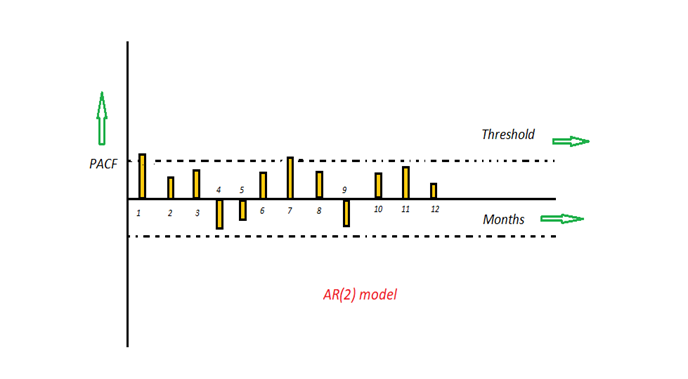

In [ ]:
#lets import the AutoReg model from statsmodel
from statsmodels.tsa.ar_model import AutoReg
from tqdm import tqdm
from utils.metrics import evaluate

In [ ]:
#!pip install tqdm

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data

#Now lets set the take the index as per the length of  

index = len(df_training)
#make a variable
y = list()
#tqdm is a wrapper function that hides the lenght of iterable 
# Using tqdm is very simple, you just need to add your code between tqdm() after importing the library in your code. 
#You need to make sure that the code you put in between the tqdm() function must be iterable or it would not work at all.
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    #We can take lags as per our choice
    model = AutoReg(temp_train.pollution_today, lags=50)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    y = y + [predictions]
# Concatenate pandas objects along a particular axis with optional set logic along the other axes.
#Can also add a layer of hierarchical indexing on the concatenation axis, 
#which may be useful if the labels are the same (or overlapping) on the passed axis number.
y = pd.concat(y)
resultsDict['AutoReg'] = evaluate(df_test.pollution_today, y.values)
predictionsDict['AutoReg'] = y.values

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(y.values, color='red', label='AutoReg predicted')
plt.legend()

In [ ]:
model_fit.summary()

# Video - 6
# B-Moving average


The Moving Average (MA) method models the next step in the sequence as the average of a window of observations at prior time steps. Parameters of the model:


Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

Consider an example of Cake distribution during my birthday. Let's assume that your mom asks you to bring pastries to the party. Every year you miss judging the no of invites to the party and end upbringing more or less no of cakes as per requirement. The difference in the actual and expected results in the error. So you want to avoid the error for this year hence we apply the moving average model on the time series and calculate the no of pastries needed this year based on past collective errors. Next, calculate the ACF values of all the lags in the time series. If the value of the ACF of any particular month is more than a significant value only those values will be considered for the model analysis.


For e.g in the below figure the values 1,2, 3 up to 12 displays the total error(ACF) of count in pastries current month w.r.t the given the lag t by considering all the in-between lags between time t and current month. If we consider two significant values above the threshold then the model will be termed as MA(2).

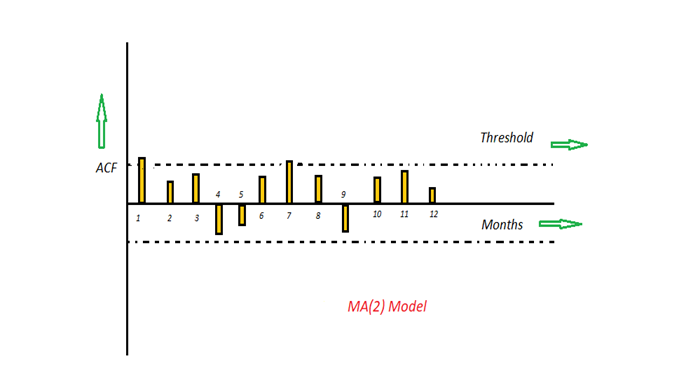

# C- ARMA



This is a model that is combined from the AR and MA models. In this model, the impact of previous lags along with the residuals is considered for forecasting the future values of the time series. 

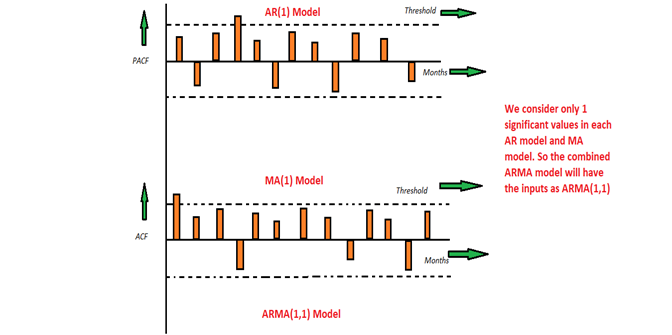

Consider the above graphs where the MA and AR values are plotted with their respective significant values. Let's assume that we consider only 1 significant value from the AR model and likewise 1 significant value from the MA model. So the ARMA model will be obtained from the combined values of the other two models will be of the order of ARMA(1,1).

**From 2022, ARMA Model, indvidually has been moved from ARIMA and it is not available for use. To give you more insights, ARMA Example can be seen as, but we will apply ARIMA and SARIMA on our model to check forecasting**

In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# Video - 7

# D-Auto-Regressive Integrated Moving Average (ARIMA) Model


We know that in order to apply the various models we must in the beginning convert the series into Stationary Time Series. In order to achieve the same, we apply the differencing or Integrated method where we subtract the t-1 value from t values of time series. After applying the first differencing if we are still unable to get the Stationary time series then we again apply the second-order differencing.



The ARIMA model is quite similar to the ARMA model other than the fact that it includes one more factor known as Integrated( I ) i.e. differencing which stands for I in the ARIMA model. So in short ARIMA model is a combination of a number of differences already applied on the model in order to make it stationary, the number of previous lags along with residuals errors in order to forecast future values.

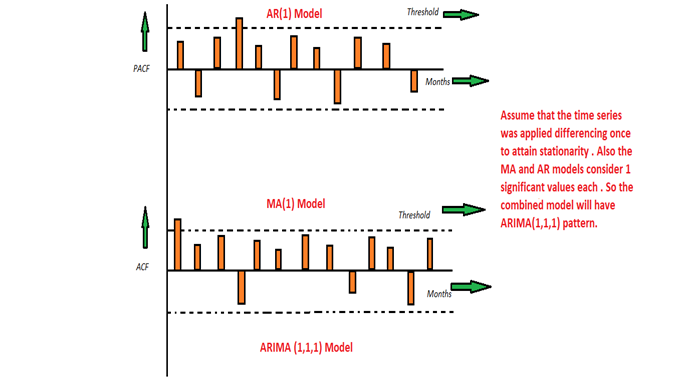

Consider the above graphs where the MA and AR values are plotted with their respective significant values. Let's assume that we consider only 1 significant value from the AR model and likewise 1 significant value from the MA model. Also, the graph was initially non-stationary and we had to perform differencing operation once in order to convert into a stationary set. Hence the ARIMA model which will be obtained from the combined values of the other two models along with the Integral operator can be displayed as ARIMA(1,1,1).

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.


Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.


Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Tuning ARIMA parameters



Non stationarity series will require level of differencing (d) >0 in ARIMA Select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots AUTOARIMA



Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['pollution_today'],order=(1,1,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

**Now Lets Change the Values of P,q,d**

In [ ]:
model=ARIMA(df['pollution_today'],order=(0,1,0))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

**Now Lets Try another variation**

In [ ]:
model=ARIMA(df['pollution_today'],order=(10,1,10))
model_fit=model.fit()
model_fit.summary()
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

# Video - 8
# E-Auto ARIMA

In [ ]:
# !pip install pmdarima

In [ ]:
import pmdarima as pm


In [ ]:
# building the model

autoModel = pm.auto_arima(df_training.pollution_today, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.pollution_today)

In [ ]:
order = autoModel.order
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.pollution_today, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoARIMA {0}'.format(order)] = evaluate(
    df_test.pollution_today, yhat)
predictionsDict['AutoARIMA {0}'.format(order)] = yhat.values

In [ ]:
model_fit.summary()

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='AutoARIMA {0}'.format(order))
plt.legend()

# Video -9


# F- Seasonal Autoregressive Integrated Moving-Average (SARIMA)
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.


It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.


Trend Elements:


There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:


p: Trend autoregression order.

d: Trend difference order.

q: Trend moving average order.

Seasonal Elements:


There are four seasonal elements that are not part of ARIMA that must be configured; they are:


P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests a yearly seasonal 
cycle.

SARIMA notation: SARIMA(p,d,q)(P,D,Q,m)

In [ ]:
import statsmodels.api as sm


In [ ]:
#order=(1, 1, 1),seasonal_order=(1,1,1,12)

#By changing these values we get different answers

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['pollution_today'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [ ]:
results.summary()

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['pollution_today','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [ ]:

future_datest_df.tail()

In [ ]:
future_df=pd.concat([df,future_datest_df])


In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['pollution_today', 'forecast']].plot(figsize=(12, 8)) 

# G- SARIMAX
The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables.

Exogenous variables are optional can be specified via the “exog” argument.
model = SARIMAX(data, exog=other_data, ...)

Rest is same as Above

# Video-10

# H- Auto SARIMA

In [ ]:
# building the model
autoModel = pm.auto_arima(df_training.pollution_today, trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
autoModel.fit(df_training.pollution_today)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
order = autoModel.order
seasonalOrder = autoModel.seasonal_order
yhat = list()
for t in tqdm(range(len(df_test.pollution_today))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.pollution_today, order=order,
                    seasonal_order=seasonalOrder)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoSARIMAX {0},{1}'.format(order, seasonalOrder)] = evaluate(
    df_test.pollution_today, yhat.values)
predictionsDict['AutoSARIMAX {0},{1}'.format(
    order, seasonalOrder)] = yhat.values

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()

# Video 10

# I- Comparison of All Models

Since SARIMA brings in seasonality as a parameter, it's significantly more powerful than ARIMA in forecasting complex data spaces containing cycles